In [1]:
import pywt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Load Data

In [2]:
path_to_data = '2021_09_20_LCB/2021_09_20_StationI_LCB.xlsx'
data = pd.read_excel(path_to_data, skiprows=44)
data1 =  data.iloc[2500:8500] 
data1.head(50)

,Unnamed: 0,Unnamed: 1,Time [h],Local time,Backscatter [a.u.],OD600 [-],Time [h].1,Growth rate [(a.u.)/h] - from backscatter,Time [h].2,Growth rate [[-]/h] - from OD600,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
2500,NaN,NaN,83.37611,2021-08-30 01:26:33,281.8084,4.861077,83.42612,0.004572,83.42612,0.002724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,NaN,NaN,83.40945,2021-08-30 01:28:33,281.8552,4.861558,83.45944,0.003806,83.45944,0.002267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,NaN,NaN,83.44278,2021-08-30 01:30:33,281.8995,4.862013,83.49278,0.002870,83.49278,0.001710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2503,NaN,NaN,83.47611,2021-08-30 01:32:33,281.9359,4.862387,83.52611,0.002271,83.52611,0.001354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2504,NaN,NaN,83.50945,2021-08-30 01:34:33,281.9619,4.862654,83.55945,0.002228,83.55945,0.001327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,NaN,NaN,83.54278,2021-08-30 01:36:33,281.9814,4.862855,83.59277,0.002457,83.59277,0.001463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,NaN,NaN,83.57611,2021-08-30 01:38:32,282.0017,4.863063,83.62611,0.002521,83.62611,0.001502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,NaN,NaN,83.60944,2021-08-30 01:40:32,282.0254,4.863307,83.65944,0.002211,83.65944,0.001317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2508,NaN,NaN,83.64278,2021-08-30 01:42:32,282.0502,4.863561,83.69278,0.001739,83.69278,0.001036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2509,NaN,NaN,83.67611,2021-08-30 01:44:32,282.0717,4.863782,83.72610,0.001548,83.72610,0.000923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Data

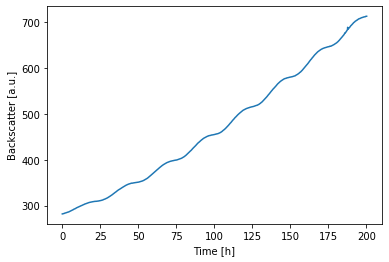

In [3]:
y = data1["Backscatter [a.u.]"]
x = (data1['Time [h]']) - (data1['Time [h]'].min()) 
plt.plot(x, y)
plt.ylabel("Backscatter [a.u.]")
plt.xlabel('Time [h]')
plt.show()

## Remove Drift from Data

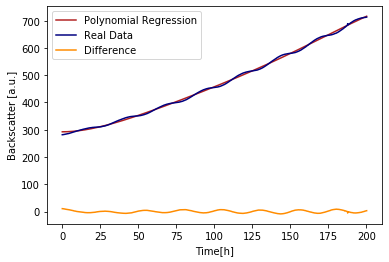

In [4]:
X = np.array(np.arange(len(x))).reshape(-1,1)
pf = PolynomialFeatures(5)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)

plt.figure()
plt.plot(x, reg.predict(X),label='Polynomial Regression', color='firebrick')
plt.plot(x, y, label='Real Data', color='navy')
plt.plot(x, (reg.predict(X)-y), label='Difference', color='darkorange')
plt.ylabel("Backscatter [a.u.]")
plt.xlabel("Time[h]")
plt.legend()
plt.show()

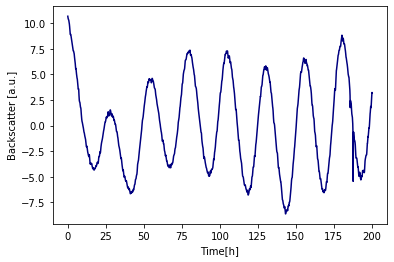

In [5]:
signal = reg.predict(X) - y
signal = signal-signal.mean()

plt.figure()
plt.plot(x, signal, color='navy')
plt.ylabel("Backscatter [a.u.]")
plt.xlabel("Time[h]")
plt.show()

## Use Moving Average to Smooth Data

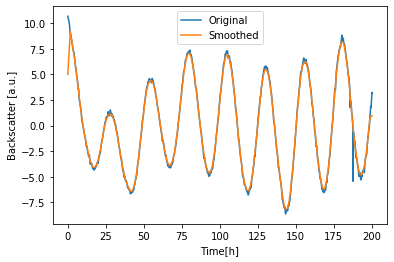

In [6]:
kernel_size = 100
kernel = np.ones(kernel_size) / kernel_size

Smoothed_signal = np.convolve(signal, kernel, mode='same')
plt.figure()
plt.plot(x, signal)
plt.plot(x, Smoothed_signal)
plt.ylabel("Backscatter [a.u.]")
plt.xlabel("Time[h]")
plt.legend(['Original', 'Smoothed'])
plt.show()

## Wavelet Transform

In [7]:
def wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.get_cmap('Dark2'), title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1./frequencies
    
    num_lev = 128
    contourlevels = np.log2(np.linspace(224, 5000, num_lev + 1)) 
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap='plasma')
    plt.rc('xtick', labelsize=19)
    plt.rc('ytick', labelsize=19)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)

    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.savefig("Wavelet_Transform.png")
    
    return time, period, power

/alto/rahil_gh/torch-env/lib/python3.6/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


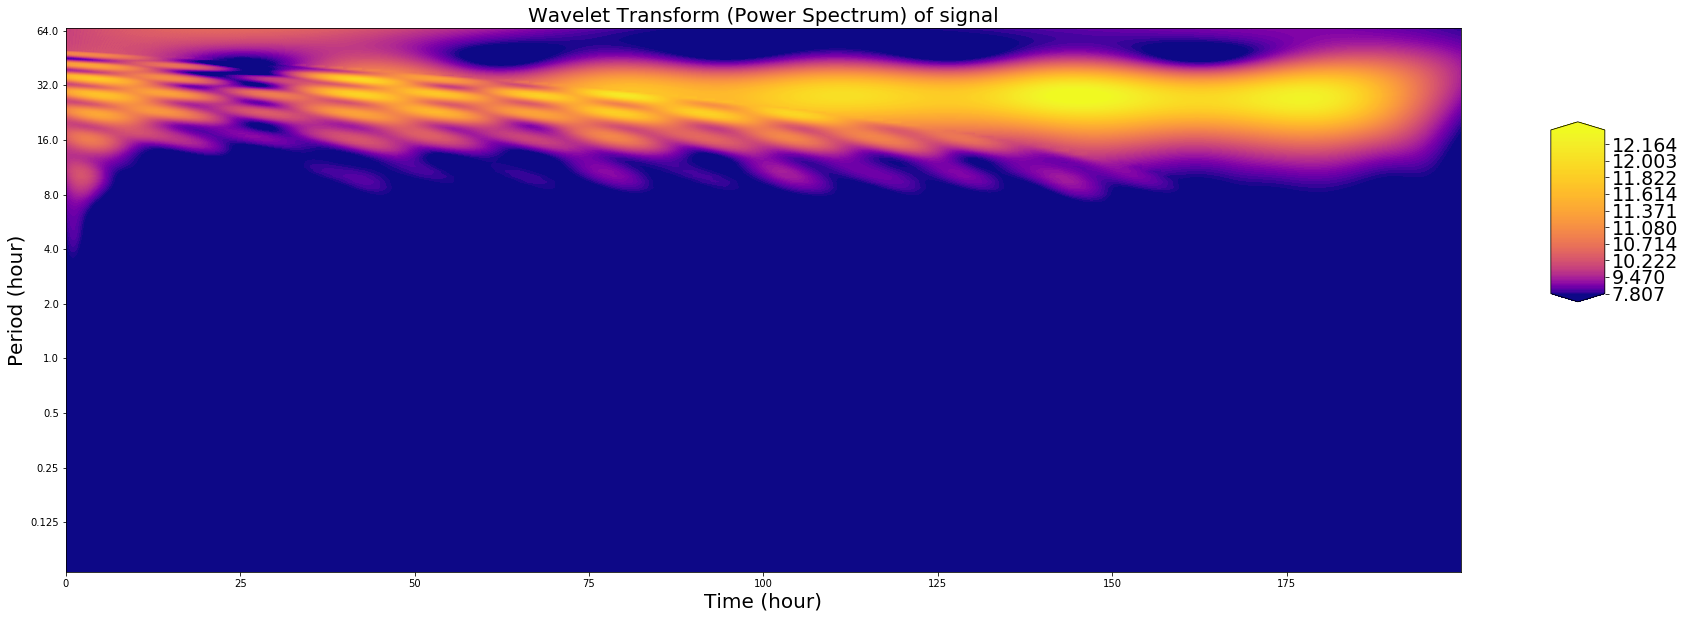

In [8]:
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (hour)'
xlabel = 'Time (hour)'
fig, ax = plt.subplots(figsize=(25, 10))

N = Smoothed_signal.shape[0]
t0 = 0
dt = (0.016666666666666666) # 1min = 1/60 h
time = np.arange(0, 2 * N, 2) * dt + t0
# scales = [20, 25, 50, 60, 70, 80, 90,100, 150, 200, 250, 300, 350, 400,
           #450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 
           #3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]  
scales = np.arange(1, 1000, 10)

time, period, power = wavelet(ax, time, Smoothed_signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)

## Average over time for each Period

In [9]:
normalization_factor = np.var(Smoothed_signal)

#### Compute Rolling Average using Pandas.rolling

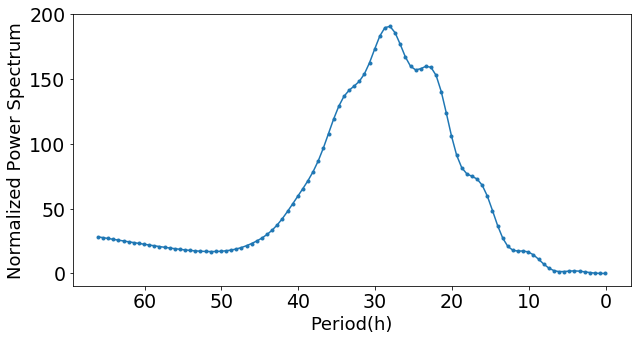

In [10]:
mean_spectrum = []
window_size = 1500
power_array = np.array(power)

for i in range(power_array.shape[0]):
    df = pd.DataFrame(data=power_array[i,:]).rolling(window=window_size)
    mean_spectrum.extend((df.mean().dropna()).mean())

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(period, mean_spectrum/normalization_factor, '.-')
ax.invert_xaxis()
plt.xlabel("Period(h)", fontsize=18)
plt.ylabel("Normalized Power Spectrum", fontsize=18)
plt.show()
plt.show()

## Establish a null hypothesis (expected background) to compare the actual spectrum against

In [11]:
def background_spectrum(alpha, N, period):
    p_lst = []
    dt = 2*(0.016666666666666666) # 1min = 1/60 h
    time = np.arange(0, N, 2) * dt

    for k in period:
        # power spectrum of x(n) = alpha * x(n-1) + z(n), alpha: lag-1 autocorrelation, z(n): guassian white noise
        p_k = (1 - np.power(alpha, 2))/(1 + np.power(alpha, 2) - 2 * alpha * np.cos((2*np.pi*dt/k))) 
        p_lst.append(p_k)
    return np.array(p_lst)

#### Compute Rolling Autocorrelation using Pandas.rolling

In [12]:
df = pd.DataFrame(data=Smoothed_signal)
window_size = 700
rolling_autocorr = df.rolling(window_size).apply(lambda x: sm.tsa.acf(x, nlags=2, fft=False)[1], raw=True)
alpha = (rolling_autocorr.dropna()).mean()

In [13]:
BPS = background_spectrum(alpha, N, period) # Background Power Spectrum

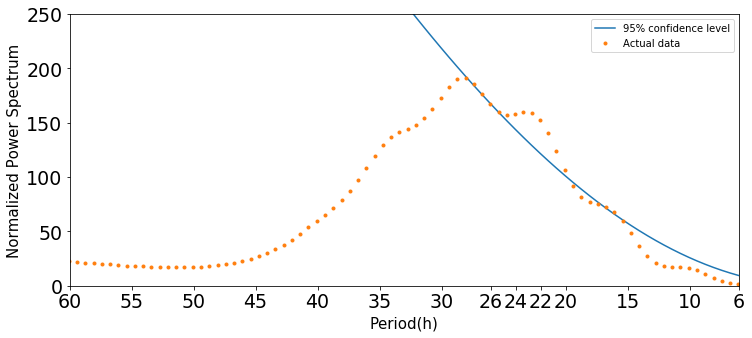

In [14]:
_95th_percentile_value = 5.99

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(period, 0.5 * _95th_percentile_value * BPS)
plt.plot(period, mean_spectrum/normalization_factor, '.')
ax.set_xticks([6, 10, 15, 20, 22, 24, 26, 30, 35, 40, 45, 50, 55, 60])
plt.ylim(0,250)
plt.xlim(6,60)
ax.invert_xaxis()
plt.xlabel("Period(h)", fontsize=15)
plt.ylabel("Normalized Power Spectrum", fontsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.legend(['95% confidence level', 'Actual data'])
plt.show()